# DataViz Homework 4. Python (tasks 1,2,3,5)
#### Author: *Albert Hakobyan*

In [565]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.backends.backend_pdf as pdf

In [160]:
bl_df = pd.read_csv('bundesliga.csv')

bliga_df = bl_df.copy() # There is a reason behind this data backup. Data manipulation will possibly create a mess.
                        # What I mean by that is that after creating extra/modified columns/rows for visualizations, 
                        # it may get difficult to transition to "bundesliga2.csv". 
bliga_df.head()

,SEASON,LEAGUE,DATE,HOMETEAM,AWAYTEAM,FTSC,FTHG,FTAG,FTTG
0,1994,Bundesliga 1,1993-08-07,Bayern Munich,Freiburg,3-1,3,1,4
1,1994,Bundesliga 1,1993-08-07,Dortmund,Karlsruhe,2-1,2,1,3
2,1994,Bundesliga 1,1993-08-07,Duisburg,Leverkusen,2-2,2,2,4
3,1994,Bundesliga 1,1993-08-07,FC Koln,Kaiserslautern,0-2,0,2,2
4,1994,Bundesliga 1,1993-08-07,Hamburg,Nurnberg,5-2,5,2,7


In [162]:
bl_df['DATE'] = pd.to_datetime(bl_df['DATE'])
bliga_df['DATE'] = pd.to_datetime(bliga_df['DATE'])

> ### Information about bundesliga.csv 

In [164]:
bliga_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7956 entries, 0 to 7955
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   SEASON    7956 non-null   int64         
 1   LEAGUE    7956 non-null   object        
 2   DATE      7956 non-null   datetime64[ns]
 3   HOMETEAM  7956 non-null   object        
 4   AWAYTEAM  7956 non-null   object        
 5   FTSC      7956 non-null   object        
 6   FTHG      7956 non-null   int64         
 7   FTAG      7956 non-null   int64         
 8   FTTG      7956 non-null   int64         
dtypes: datetime64[ns](1), int64(4), object(4)
memory usage: 559.5+ KB


In [166]:
print("Missing values per column:")
print(bliga_df.isnull().sum(), "\n")

print("Date range:")
print(f"Start: {bliga_df['DATE'].min()}, End: {bliga_df['DATE'].max()}", "\n")

Missing values per column:
SEASON      0
LEAGUE      0
DATE        0
HOMETEAM    0
AWAYTEAM    0
FTSC        0
FTHG        0
FTAG        0
FTTG        0
dtype: int64 

Date range:
Start: 1993-08-07 00:00:00, End: 2019-05-18 00:00:00 



---
## PART 1. Trend Analysis
1. Analyse trend of goals per season. For example total goals per match, average goals per match.
2. Goal Distribution Per Season. Use appropriate type of graphs for goals per match, year-wise. Color-code by whether average is above or below 2.5 (over/under bet threshold).
3. Create line charts for each season. Visualize trend of goals for each team that played in that season.
Highlight only Bayern Munchen with red color. Rest should be gray. Add appropriate title that will contain information about season and total scored goals. Add footnote mentioning total number of goals scored by Bayern Munchen for that season. Save all graphs in pdf.

In [170]:
# Goals per match (already in the dataset as FTHG and FTAG)
bliga_df['Total_goals_per_match'] = bliga_df['FTHG'] + bliga_df['FTAG']
 
# New DF  (grouped by season and statistics from aggregate function) !!!used for league-wide trends!!!
Goals_by_season = bliga_df.groupby('SEASON').agg(Total_matches=('HOMETEAM', 'count'),
                                                    Total_goals=('Total_goals_per_match', 'sum'),
                                            Avg_goals_per_match=('Total_goals_per_match', 'mean'),
                                                 Avg_home_goals=('FTHG', 'mean'),
                                                 Avg_away_goals=('FTAG', 'mean')).reset_index()
Goals_by_season.head(7)

,SEASON,Total_matches,Total_goals,Avg_goals_per_match,Avg_home_goals,Avg_away_goals
0,1994,306,895,2.924837,1.751634,1.173203
1,1995,306,918,3.000000,1.764706,1.235294
2,1996,306,831,2.715686,1.542484,1.173203
3,1997,306,911,2.977124,1.781046,1.196078
4,1998,306,883,2.885621,1.666667,1.218954
5,1999,306,866,2.830065,1.689542,1.140523
6,2000,306,885,2.892157,1.712418,1.179739


### Trends

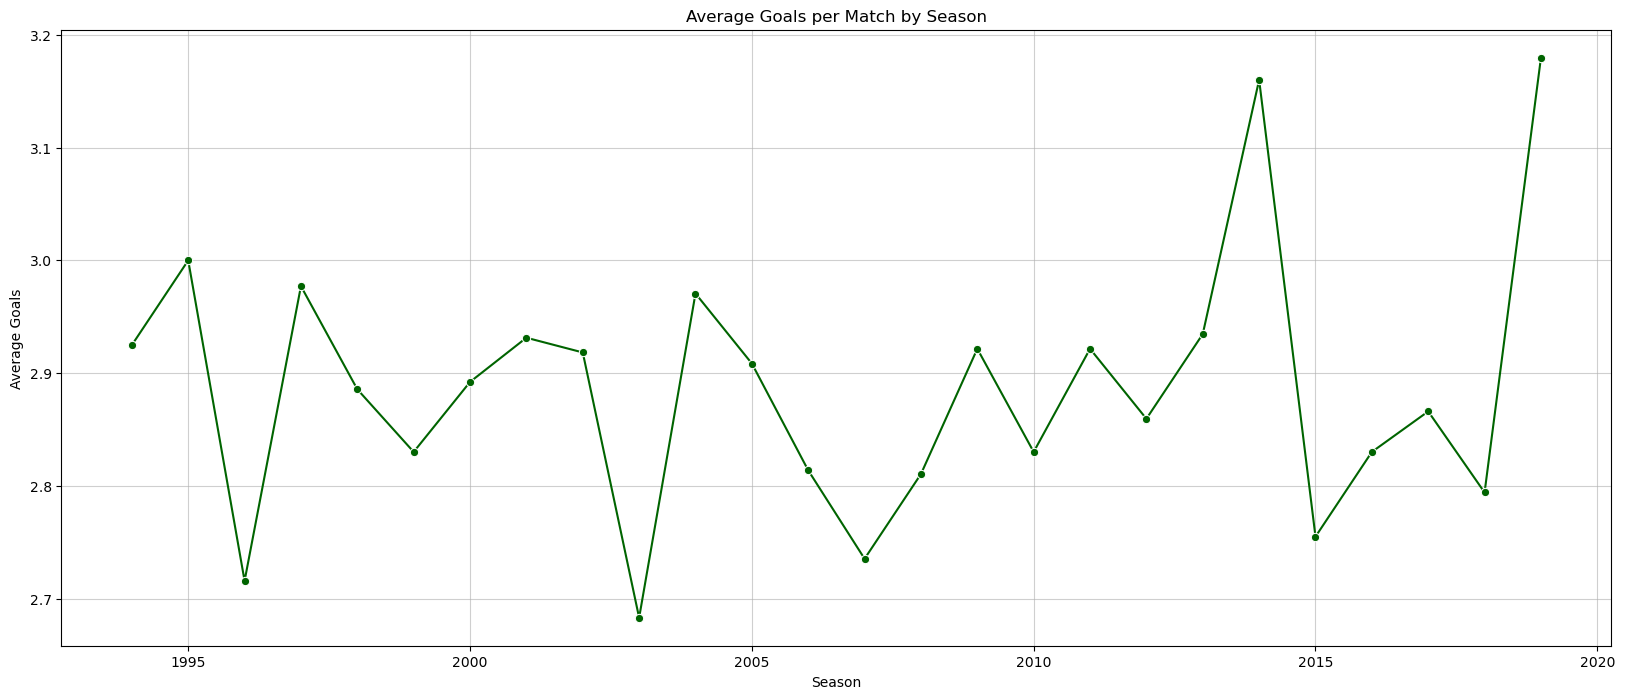

In [172]:
# Average goals per match (Lineplot with scatterplot)
plt.figure(figsize=(20, 8))
sns.lineplot(x='SEASON', y='Avg_goals_per_match', data = Goals_by_season, marker='o', color = "darkgreen")
plt.title('Average Goals per Match by Season')
plt.xlabel('Season')
plt.ylabel('Average Goals')
plt.grid(True, alpha=0.6)
plt.show()

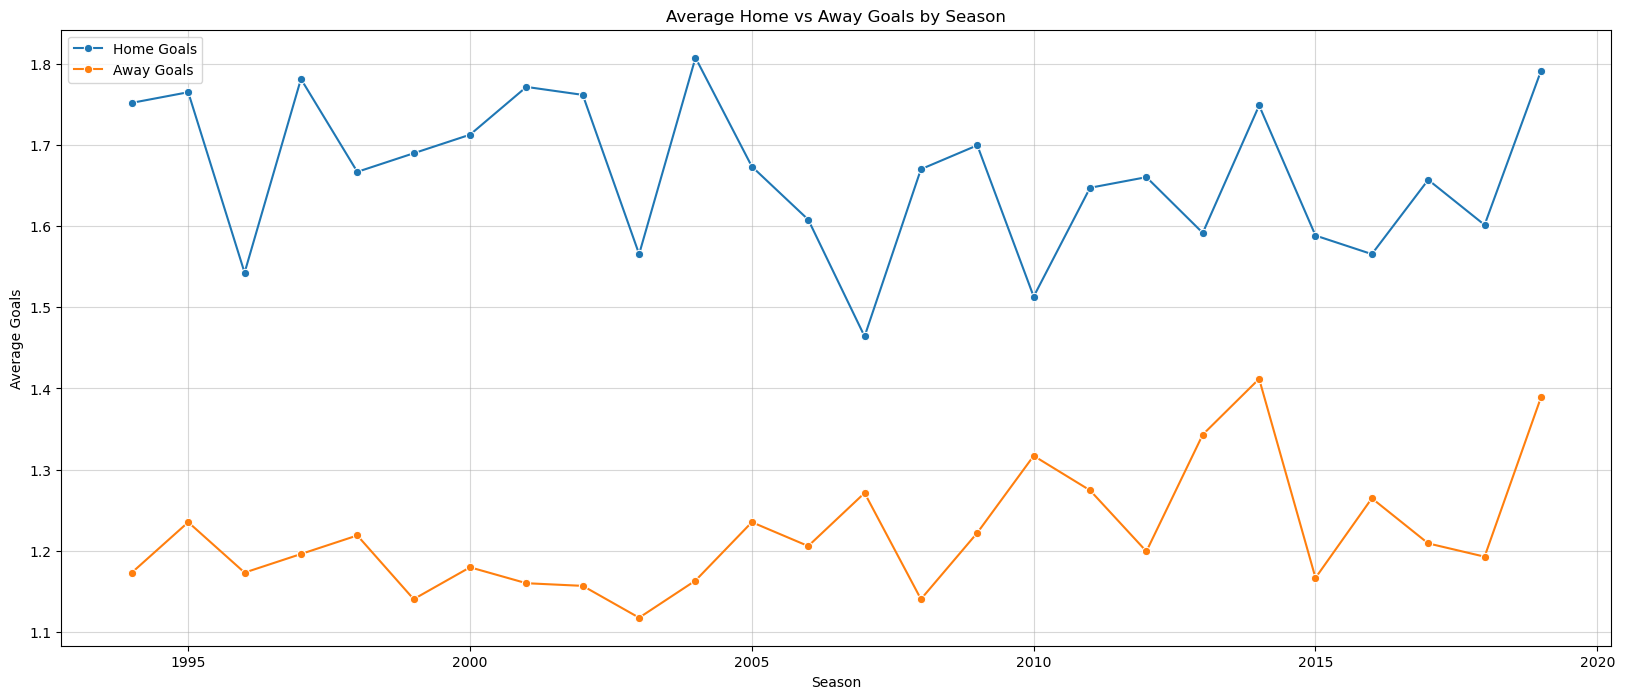

In [174]:
# Home vs away goals lineplot_scatterplot
plt.figure(figsize=(20, 8))
sns.lineplot(x='SEASON', y='Avg_home_goals', data = Goals_by_season, marker='o', label='Home Goals')
sns.lineplot(x='SEASON', y='Avg_away_goals', data = Goals_by_season, marker='o', label='Away Goals')
plt.title('Average Home vs Away Goals by Season')
plt.xlabel('Season')
plt.ylabel('Average Goals')
plt.legend()
plt.grid(True, alpha=0.5)

In [176]:
Goals_by_season['growth_rate'] = Goals_by_season['Avg_goals_per_match'].pct_change() * 100 # Annual growth rates in scoring 
                            #(pct_change is a pandas function. It gives the fractional change between the current and a prior element.)


# Seasons with significant changes in scoring trends
significant_changes = Goals_by_season[abs(Goals_by_season['growth_rate']) > 5].sort_values('growth_rate') # sorted |trend > 5| 
print("Seasons with significant changes in scoring (above 5% change):")
print(significant_changes[['SEASON', 'Avg_goals_per_match', 'growth_rate']].reset_index())

Seasons with significant changes in scoring (above 5% change):
   index  SEASON  Avg_goals_per_match  growth_rate
0     21    2015             2.754902   -12.823164
1      2    1996             2.715686    -9.477124
2      9    2003             2.683007    -8.062710
3     20    2014             3.160131     7.683742
4      3    1997             2.977124     9.626955
5     10    2004             2.970588    10.718636
6     25    2019             3.179739    13.801170


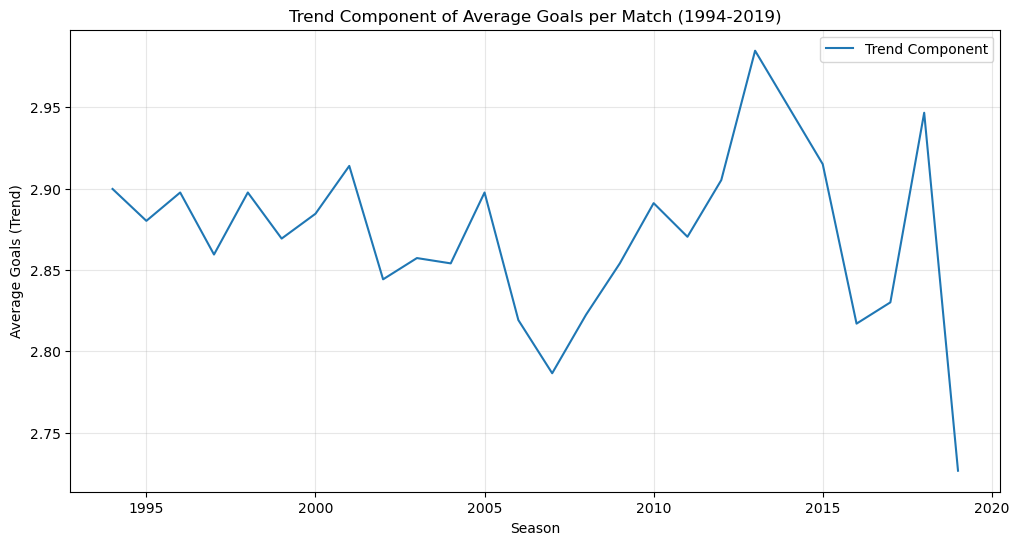

Trend component values by season:


SEASON
1994    2.899782
1995    2.880174
1996    2.897603
1997    2.859477
1998    2.897603
1999    2.869281
2000    2.884532
2001    2.913943
2002    2.844227
2003    2.857298
2004    2.854031
2005    2.897603
2006    2.819172
2007    2.786492
2008    2.822440
2009    2.854031
2010    2.891068
2011    2.870370
2012    2.905229
2013    2.984749
2014    2.949891
2015    2.915033
2016    2.816993
2017    2.830065
2018    2.946623
2019    2.726580
Name: trend, dtype: float64

In [178]:
time_series = Goals_by_season.set_index('SEASON')['Avg_goals_per_match']
decomposition = seasonal_decompose(time_series, model='additive', period=3, extrapolate_trend='freq')

plt.figure(figsize=(12, 6))
decomposition.trend.plot(label='Trend Component')
plt.title('Trend Component of Average Goals per Match (1994-2019)')
plt.xlabel('Season')
plt.ylabel('Average Goals (Trend)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

print("Trend component values by season:")
decomposition.trend

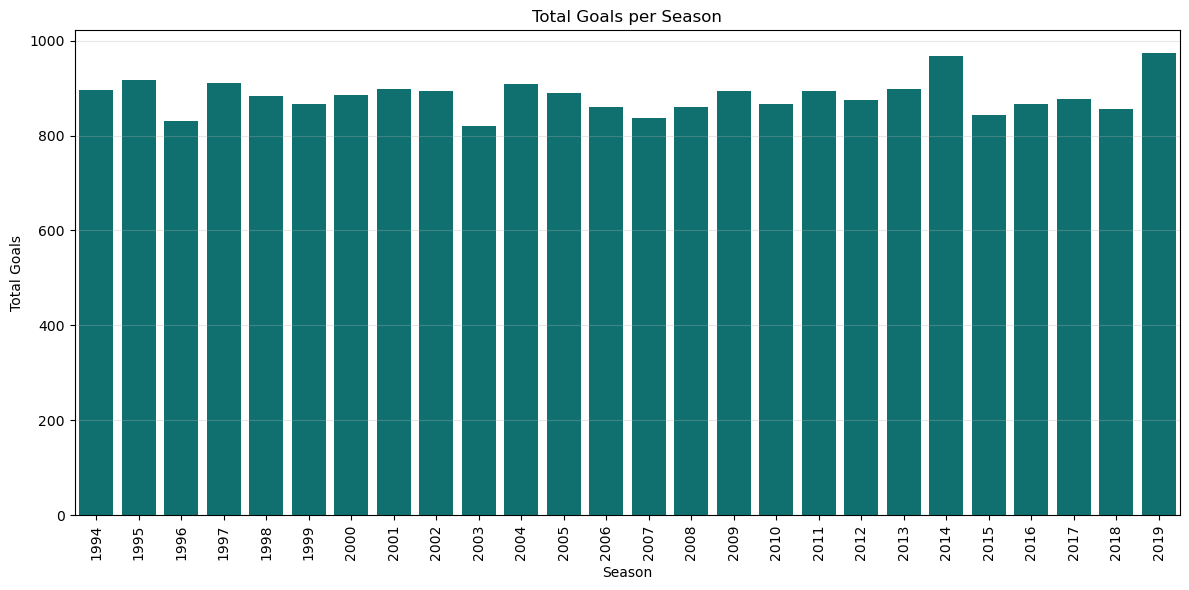

In [180]:
# Plot total goals per season
plt.figure(figsize=(12, 6))
sns.barplot(x='SEASON', y='Total_goals', data = Goals_by_season, color="teal")
plt.title('Total Goals per Season')
plt.xlabel('Season')
plt.ylabel('Total Goals')
plt.xticks(rotation=90)
plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()

In [182]:
Top_seasons = Goals_by_season.nlargest(3, 'Total_goals')
Bottom_seasons = Goals_by_season.nsmallest(3, 'Total_goals')
print("\nTop 3 seasons with most goals:\n")
print(Top_seasons[['SEASON', 'Total_goals', 'Total_matches']].reset_index(), "\n")
print("Bottom 3 seasons with fewest goals:", "\n")
print(Bottom_seasons[['SEASON', 'Total_goals', 'Total_matches']].reset_index())


Top 3 seasons with most goals:

   index  SEASON  Total_goals  Total_matches
0     25    2019          973            306
1     20    2014          967            306
2      1    1995          918            306 

Bottom 3 seasons with fewest goals: 

   index  SEASON  Total_goals  Total_matches
0      9    2003          821            306
1      2    1996          831            306
2     13    2007          837            306


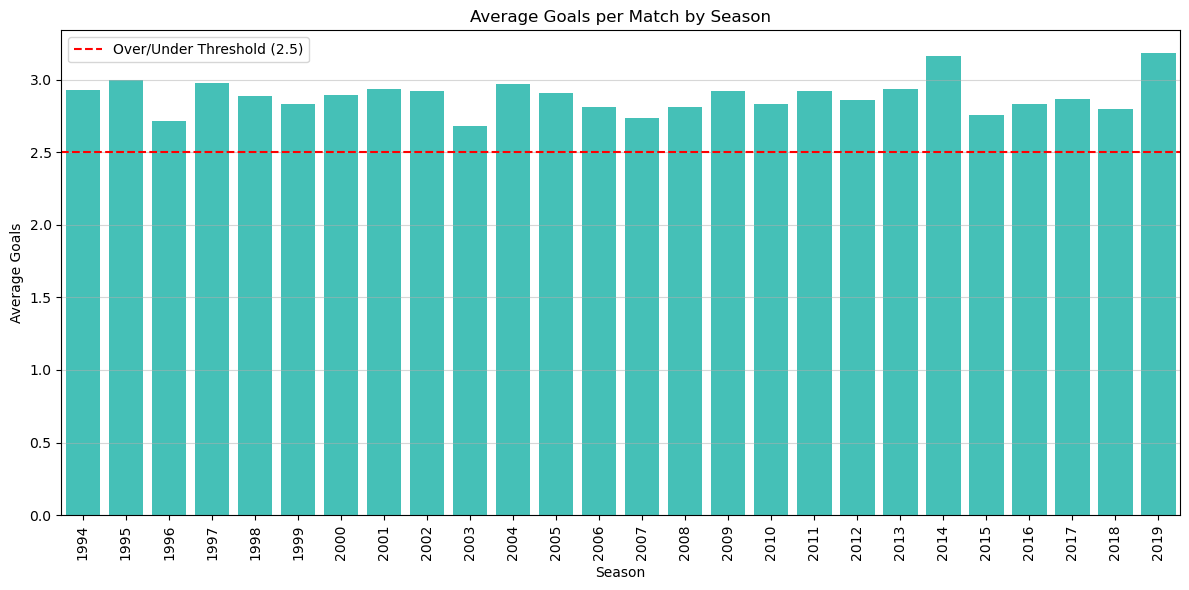

In [184]:
# AVG Goal distribution plot per season
plt.figure(figsize=(12, 6))
colors = ['#30D5C8' if x >= 2.5 else '#008080' for x in Goals_by_season['Avg_goals_per_match']]

Barplot = sns.barplot(x='SEASON', y='Avg_goals_per_match', data = Goals_by_season, hue='SEASON', palette = colors, legend=False)

plt.axhline(y = 2.5, color='red', linestyle='--', label='Over/Under Threshold (2.5)') 
plt.title('Average Goals per Match by Season')
plt.xlabel('Season')
plt.ylabel('Average Goals')
plt.xticks(rotation = 90)
plt.grid(True, alpha = 0.5, axis='y')
plt.legend()
plt.tight_layout()
plt.show()

### The codeblock bellow was intended for a different visualization, 
### *but since I may use some parts of it in future visualizations, I will keep it here, just in case.*

In [499]:
Team_season_stats = bliga_df.groupby(['SEASON', 'HOMETEAM']).agg(Matches=('HOMETEAM', 'count'),
                                                        TotalGoalsScored=('FTHG', 'sum'),
                                                        TotalGoalsConceded=('FTAG', 'sum'),
                                                        AvgGoalsScored=('FTHG', 'mean'),
                                                        AvgGoalsConceded=('FTAG', 'mean')).reset_index()

Team_season_stats.rename(columns={'HOMETEAM': 'Team', 'SEASON': 'Season'}, inplace=True)

# Aggregating away team data the same way
away_stats = bliga_df.groupby(['SEASON', 'AWAYTEAM']).agg(Matches=('AWAYTEAM', 'count'),
                                                TotalGoalsScored=('FTAG', 'sum'),
                                                TotalGoalsConceded=('FTHG', 'sum'),
                                                    AvgGoalsScored=('FTAG', 'mean'),
                                                AvgGoalsConceded=('FTHG', 'mean')).reset_index()

away_stats.rename(columns={'AWAYTEAM': 'Team', 'SEASON': 'Season'}, inplace=True)

Team_season_stats = pd.concat([Team_season_stats, away_stats]) # Combining home and away stats

# Aggregating again to get total and average values 
# but this time, across home & away matches
Team_season_stats = Team_season_stats.groupby(['Season', 'Team']).agg(Matches=('Matches', 'sum'),
                                                            TotalGoalsScored=('TotalGoalsScored', 'sum'),
                                                            TotalGoalsConceded=('TotalGoalsConceded', 'sum'),
                                                            AvgGoalsScored=('AvgGoalsScored', 'mean'),
                                                            AvgGoalsConceded=('AvgGoalsConceded', 'mean')).reset_index()

In [511]:
unique_teams = bliga_df['HOMETEAM'].unique()
unique_teams_count = len(unique_teams)

print(unique_teams_count)

43


> ### There are too many TEAMS in this dataset, therefore I want to take a subset of the best teams only for reasonable visualizations. 

In [218]:
top_teams = Team_season_stats.groupby('Team')['Season'].nunique().sort_values(ascending=False).head(15).index.tolist()

### ***Just in case I misunderstood the task:***

In [286]:
import matplotlib.pyplot as plt
import matplotlib.backends.backend_pdf as pdf
import seaborn as sns

with pdf.PdfPages('bayern_munich_season_goals.pdf') as pdf_file:
    for season in bliga_df['SEASON'].unique():
        # taking only the data for the current "season" (iteration of the for loop with each season)
        season_data = Team_season_stats[Team_season_stats['Season'] == season].copy()
        season_data = season_data.sort_values('TotalGoalsScored', ascending=False) # Sorting (by goals scored (descending))
        season_data['Rank'] = range(1, len(season_data) + 1) # Adding the positions for x-axis (ranks teams by goals)
        plt.figure(figsize=(14, 7))
        
        # Plotting line connecting all teams' goals (will be a descending line)
        sns.lineplot(x='Rank', y='TotalGoalsScored', data = season_data, color='gray', marker='o', alpha = 0.9)
        
         # Highlighting Bayern Munich with red color if present in this season
        if 'Bayern Munich' in season_data['Team'].values: 
            bayern_data = season_data[season_data['Team'] == 'Bayern Munich']
            bayern_goals = bayern_data['TotalGoalsScored'].values[0]
            bayern_rank = bayern_data['Rank'].values[0]
        
            sns.lineplot(x='Rank', y='TotalGoalsScored', data=bayern_data,
                      color='red', marker='o', markersize=10, linewidth=0, label='Bayern Munich') # Ploting Bayern Munich point in red
            
            plt.text(bayern_rank, bayern_goals, 'Bayern Munich', color='red', fontweight='bold', ha='right', va='bottom')
    
        total_season_goals = season_data['TotalGoalsScored'].sum() # Total goals for the season (for the title)
        plt.title(f'Season {season}: Team Goals Distribution ({total_season_goals} total goals)', fontsize=14)
        plt.xlabel('Team Rank (by Goals Scored)', fontsize = 12)
        plt.ylabel('Total Goals Scored', fontsize = 12)
        plt.xticks(season_data['Rank']) # Setting x-axis ticks to show only the ranks
        
        if 'Bayern Munich' in season_data['Team'].values: # Adding footnote for Bayern's goals
            plt.figtext(0.5, 0.01, f'Bayern Munich scored {bayern_goals} goals in season {season}', ha='center', fontsize=10, 
                        style='italic')
        
        plt.grid(True, linestyle='--', alpha=0.7)
        if 'Bayern Munich' in season_data['Team'].values: # Adding legend if Bayern is presen
            plt.legend()
        plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Making room for the footnote
        pdf_file.savefig()
        plt.close()

---
## PART 2. Home Advantage Deconstructed (Python)
1. Create Heatmap of Home vs. Away Wins per Team per Season
2. Point Differential Density: Create visualizations that will show difference per team for home and away game wins.

In [282]:
# Home and away wins
home_wins = bliga_df.groupby(['SEASON', 'HOMETEAM'])['HomeWin'].sum().reset_index()
home_wins.rename(columns={'HOMETEAM': 'Team', 'HomeWin': 'HomeWins'}, inplace=True)

away_wins = bliga_df.groupby(['SEASON', 'AWAYTEAM'])['AwayWin'].sum().reset_index()
away_wins.rename(columns={'AWAYTEAM': 'Team', 'AwayWin': 'AwayWins'}, inplace=True)

team_wins = pd.merge(home_wins, away_wins, on=['SEASON', 'Team'], how='outer').fillna(0) # Merging the dataframes
team_wins['HomeAwayDiff'] = team_wins['HomeWins'] - team_wins['AwayWins'] # New column: HomeAwayDiff with the differences

team_wins.head()

,SEASON,Team,HomeWins,AwayWins,HomeAwayDiff
0,1994,Bayern Munich,13,4,9
1,1994,Dortmund,13,2,11
2,1994,Dresden,7,3,4
3,1994,Duisburg,7,7,0
4,1994,Ein Frankfurt,8,7,1


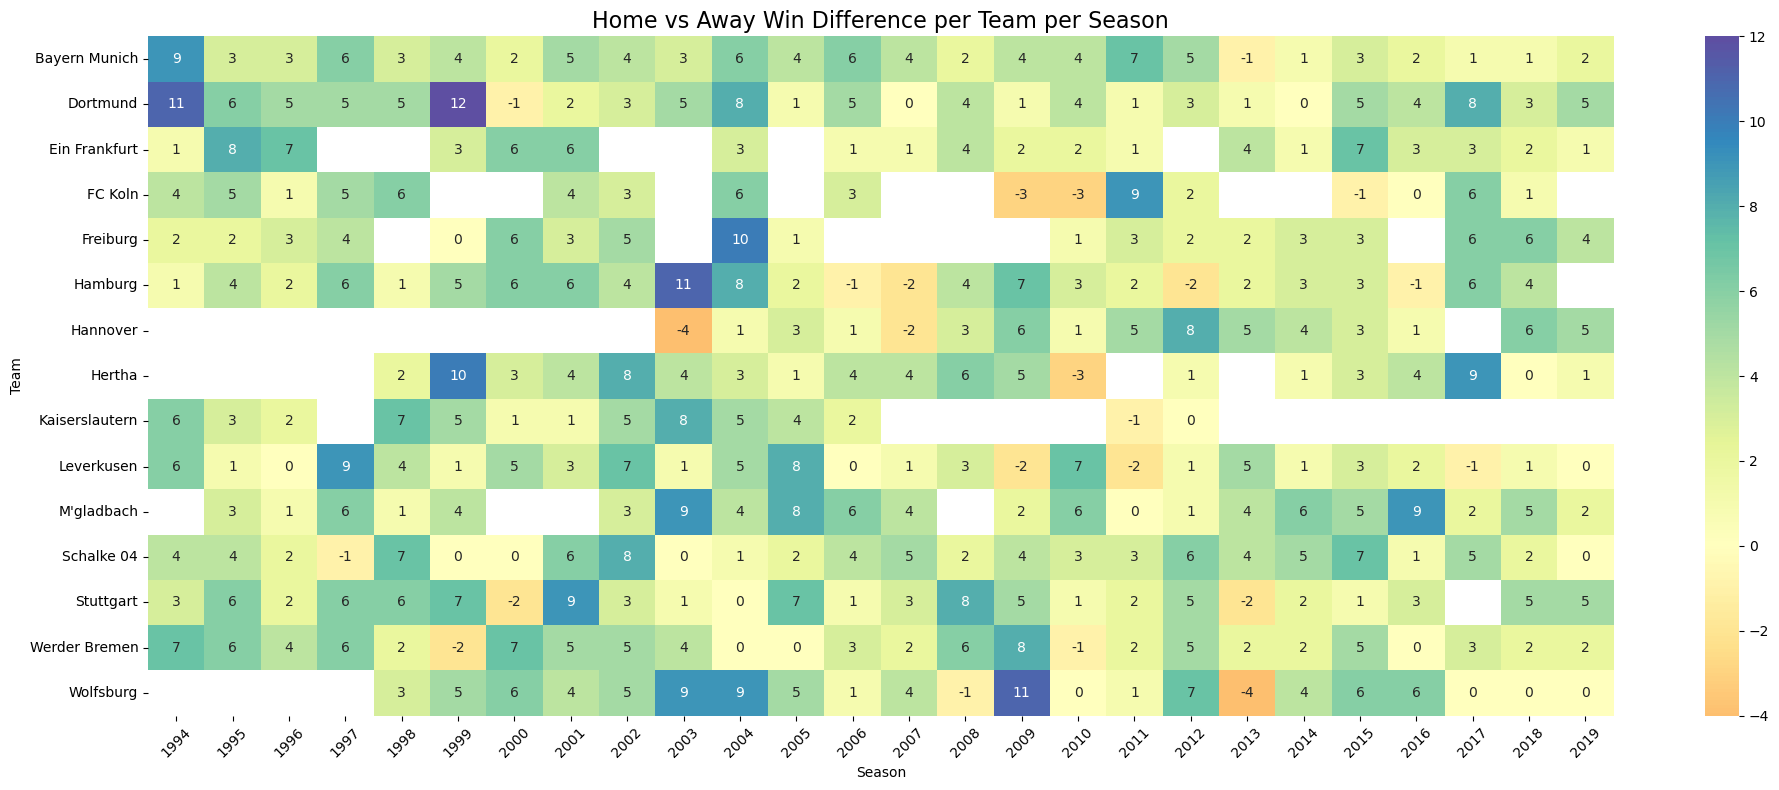

In [284]:
# if you want to view the heatmap with more teams, uncommonet the bellow line + modify the number in the head 
#top_teams = Team_season_stats.groupby('Team')['Season'].nunique().sort_values(ascending=False).head(20).index.tolist()
filtered_wins = team_wins[team_wins['Team'].isin(top_teams)]

plt.figure(figsize=(20, 8))
sns.heatmap(filtered_wins.pivot(index='Team', columns='SEASON', values='HomeAwayDiff'), cmap="Spectral", center=0, annot=True)

plt.title('Home vs Away Win Difference per Team per Season', fontsize=16)
plt.xlabel('Season')
plt.ylabel('Team')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

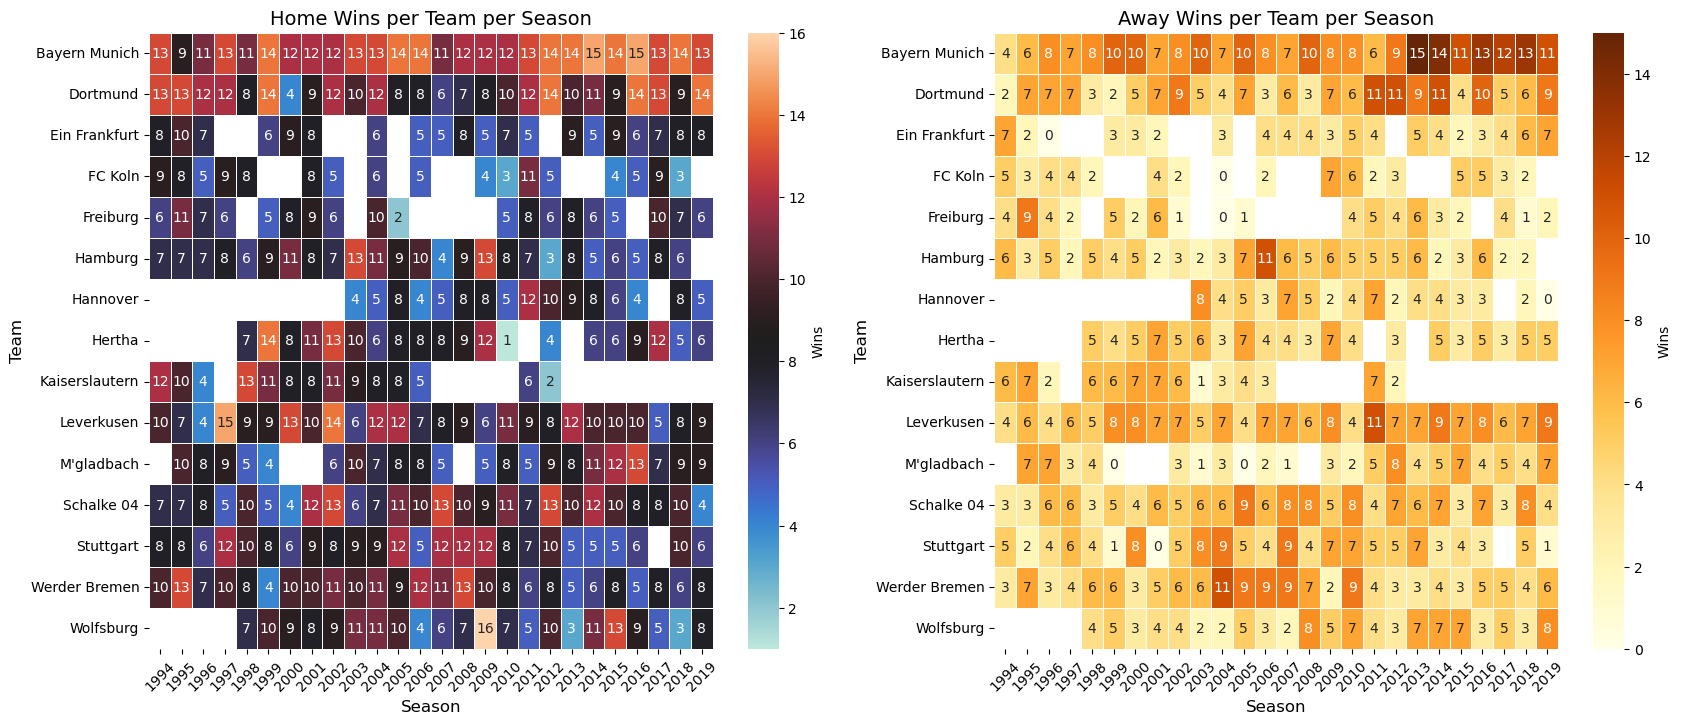

In [270]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))
# Home wins heatamp
home_pivot = filtered_wins.pivot(index='Team', columns='SEASON', values='HomeWins')
sns.heatmap(home_pivot, cmap="icefire", annot=True, linewidths=.5, ax = ax1, cbar_kws={"label": "Wins"})
ax1.set_title('Home Wins per Team per Season', fontsize=14)
ax1.set_xlabel('Season', fontsize=12)
ax1.set_ylabel('Team', fontsize=12)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45)

# Away wins heatmap
away_pivot = filtered_wins.pivot(index='Team', columns='SEASON', values='AwayWins')
sns.heatmap(away_pivot, cmap="YlOrBr", annot=True, linewidths=.5, ax=ax2, cbar_kws={"label": "Wins"})
ax2.set_title('Away Wins per Team per Season', fontsize=14)
ax2.set_xlabel('Season', fontsize=12)
ax2.set_ylabel('Team', fontsize=12)
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45)
plt.show()

In [435]:
# home team score - away team score (PointDIff)
bliga_df['PointDiff'] = bliga_df['FTHG'] - bliga_df['FTAG']

home_diffs = bliga_df[['SEASON', 'HOMETEAM', 'PointDiff']].copy()
home_diffs.rename(columns={'HOMETEAM': 'Team'}, inplace=True)
home_diffs['Location'] = 'Home'

away_diffs = bliga_df[['SEASON', 'AWAYTEAM', 'PointDiff']].copy()
away_diffs['PointDiff'] = -away_diffs['PointDiff']  # Inverting for "away" perspective
away_diffs.rename(columns={'AWAYTEAM': 'Team'}, inplace=True)
away_diffs['Location'] = 'Away'

# Combining the datasets
all_diffs = pd.concat([home_diffs, away_diffs])

all_diffs.head(5)
#all_diffs.tail(5)

,SEASON,Team,PointDiff,Location
0,1994,Bayern Munich,2,Home
1,1994,Dortmund,1,Home
2,1994,Duisburg,0,Home
3,1994,FC Koln,-2,Home
4,1994,Hamburg,3,Home


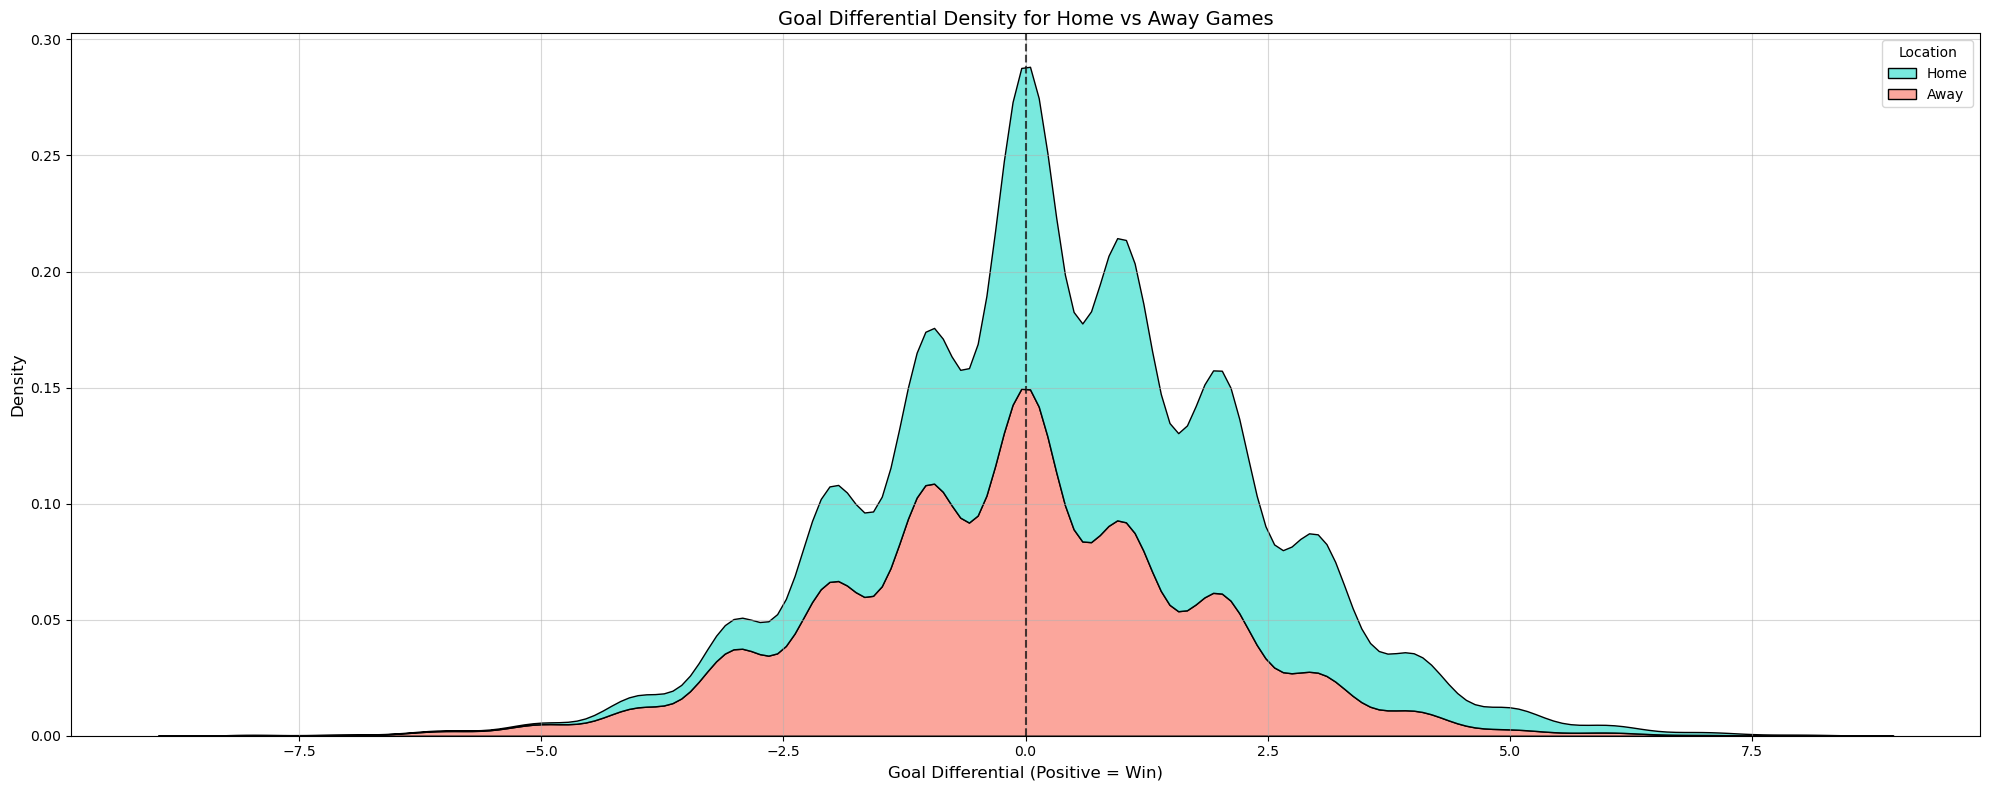

In [310]:
# Filtering for top 6 teams by number of games
top_teams = all_diffs['Team'].value_counts().head(9).index.tolist()
top_team_diffs = all_diffs[all_diffs['Team'].isin(top_teams)]

# Density plots
plt.figure(figsize=(20, 8))
sns.kdeplot(data=top_team_diffs, x='PointDiff', hue='Location', multiple='stack', palette=['turquoise', 'salmon'], alpha=0.7)

plt.axvline(x = 0, color='black', linestyle='--', alpha = 0.7)
plt.title('Goal Differential Density for Home vs Away Games', fontsize=14)
plt.xlabel('Goal Differential (Positive = Win)', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.grid(alpha=0.5)
plt.tight_layout()
plt.show()

### *Now the same Pointdiff KDE plot, but for each and every team*

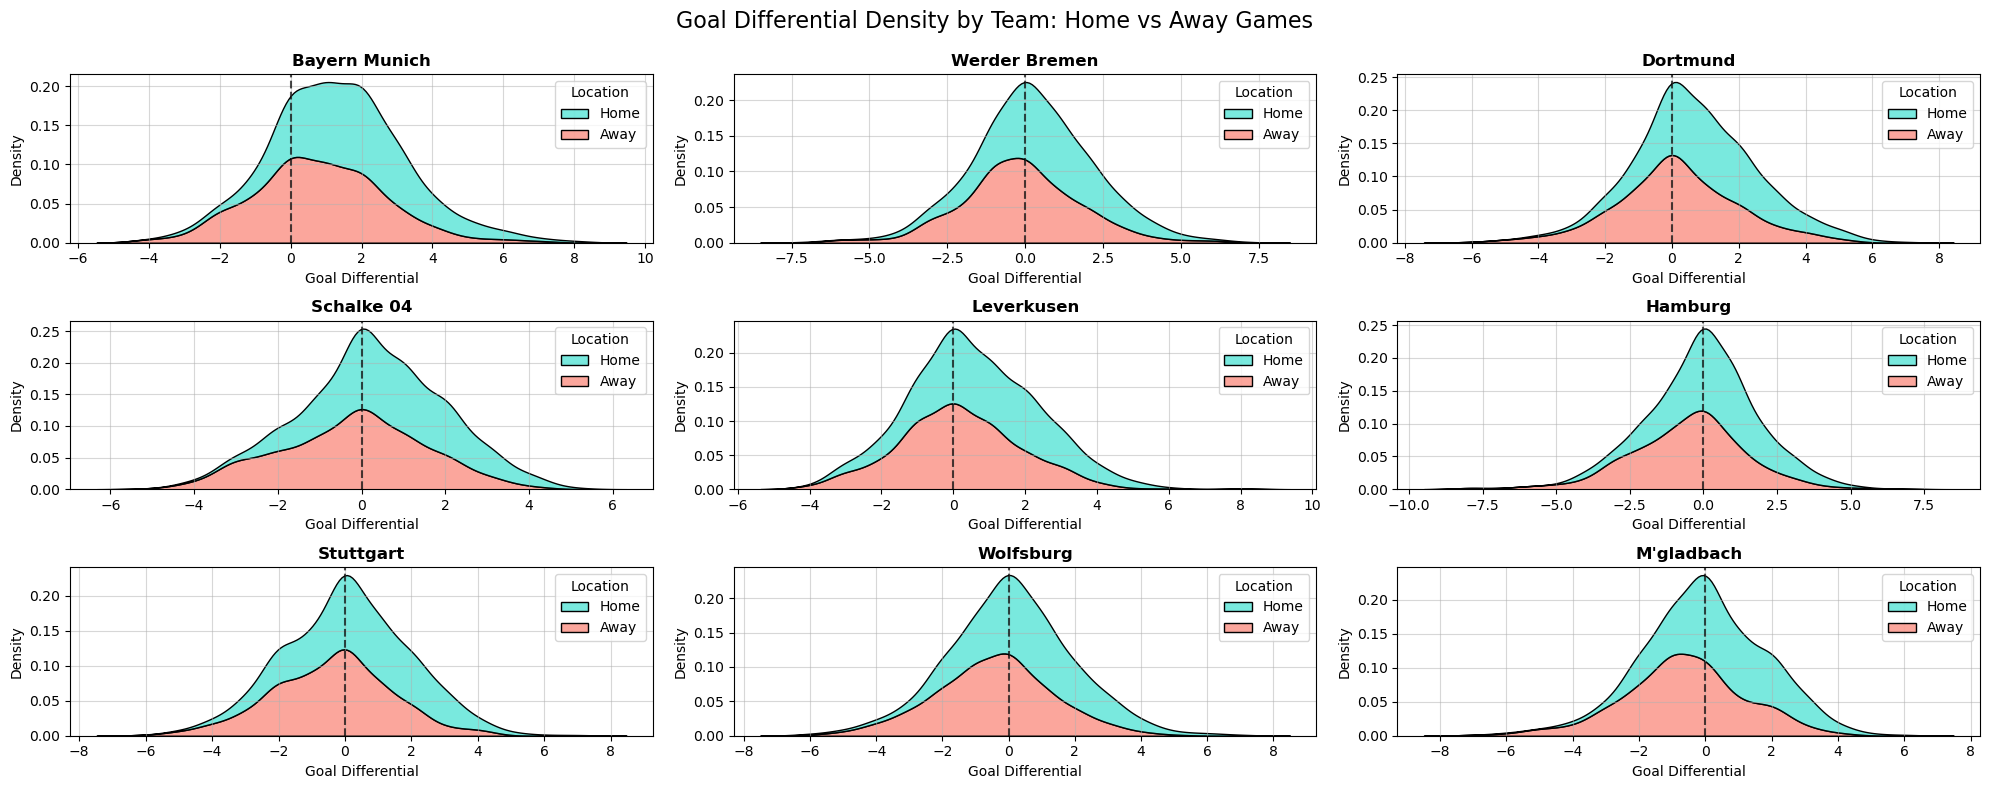

In [341]:
fig, axes = plt.subplots(3, 3, figsize=(20, 8))
axes = axes.flatten()

for i, team in enumerate(top_teams):
    team_data = top_team_diffs[top_team_diffs['Team'] == team]
    
    sns.kdeplot(data=team_data, x='PointDiff', hue='Location', multiple='stack', ax=axes[i], 
                palette=['turquoise', 'salmon'], alpha=0.7)
    
    axes[i].axvline(x = 0, color='black', linestyle='--', alpha=0.7)
    axes[i].set_title(f'{team}', fontsize=12, fontweight='bold')
    axes[i].set_xlabel('Goal Differential')
    axes[i].grid(alpha = 0.5)

plt.suptitle('Goal Differential Density by Team: Home vs Away Games', fontsize=16)
plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show()

---
# PART 3. Team Trajectories and Volatility:
1. Seasonal Position Trajectories
2. Line plots showing seasonal ranks for top 6 teams.
3. Annotate title-winning seasons.

In [437]:
# Adding season rankings based on total goals scored
# (Since we don't have league table positions in the dataset, we'll use goal ranking as a nucleo)
season_rankings = Team_season_stats.groupby(['Season', 'Team'])['TotalGoalsScored'].sum().reset_index()

# For each season, calculating the rank (1 = highest # of goals)
ranking_df = season_rankings.groupby('Season').apply(
    lambda x: x.sort_values('TotalGoalsScored', ascending=False).assign(
        Rank=lambda df: np.arange(1, len(df) + 1))).reset_index(drop=True)

top6_teams = Team_season_stats.groupby('Team')['Season'].nunique().sort_values(ascending=False).head(6).index.tolist()

# Filtering for only these teams in the rankings (for somewhat comprehensive lineplot)
top_team_rankings = ranking_df[ranking_df['Team'].isin(top6_teams)]

# TITLE WINNERS ARE THE N1-s
title_winners = ranking_df[ranking_df['Rank'] == 1]

/var/folders/7c/pvybjh094kv1kx3g5xlrqlg80000gp/T/ipykernel_67337/3025490300.py:6: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  ranking_df = season_rankings.groupby('Season').apply(


In [419]:
# Creating rankings (based on the total goals scored)
season_rankings = Team_season_stats.groupby(['Season', 'Team'])['TotalGoalsScored'].sum().reset_index()

# Make sure Season is preserved as a column
ranking_df = pd.DataFrame()
for season, season_data in season_rankings.groupby('Season'):
    ranked_data = season_data.sort_values('TotalGoalsScored', ascending=False).copy()
    ranked_data['Rank'] = np.arange(1, len(ranked_data) + 1)
    ranking_df = pd.concat([ranking_df, ranked_data])

# Top teams and champions:
top_team_rankings = ranking_df[ranking_df['Team'].isin(top6_teams)]
title_winners = ranking_df[ranking_df['Rank'] == 1]

print(title_winners)

team_colors = {'Bayern Munich': '#DC052D', 'Werder Bremen': '#1E7B3A', 'Schalke 04': '#0057A6', 
               'Dortmund': '#FDE100', 'Leverkusen': '#E32221', 'Hamburg': '#0A3161'}

     Season           Team  TotalGoalsScored  Rank
0      1994  Bayern Munich                68     1
35     1995  Werder Bremen                70     1
37     1996       Dortmund                76     1
70     1997      Stuttgart                78     1
72     1998  Bayern Munich                69     1
90     1999  Bayern Munich                76     1
118    2000     Leverkusen                74     1
139    2001     Schalke 04                65     1
153    2002     Leverkusen                77     1
162    2003  Bayern Munich                70     1
196    2004  Werder Bremen                79     1
198    2005  Bayern Munich                75     1
232    2006  Werder Bremen                79     1
250    2007  Werder Bremen                76     1
268    2008  Werder Bremen                75     1
287    2009      Wolfsburg                80     1
288    2010  Bayern Munich                72     1
306    2011  Bayern Munich                81     1
326    2012       Dortmund     

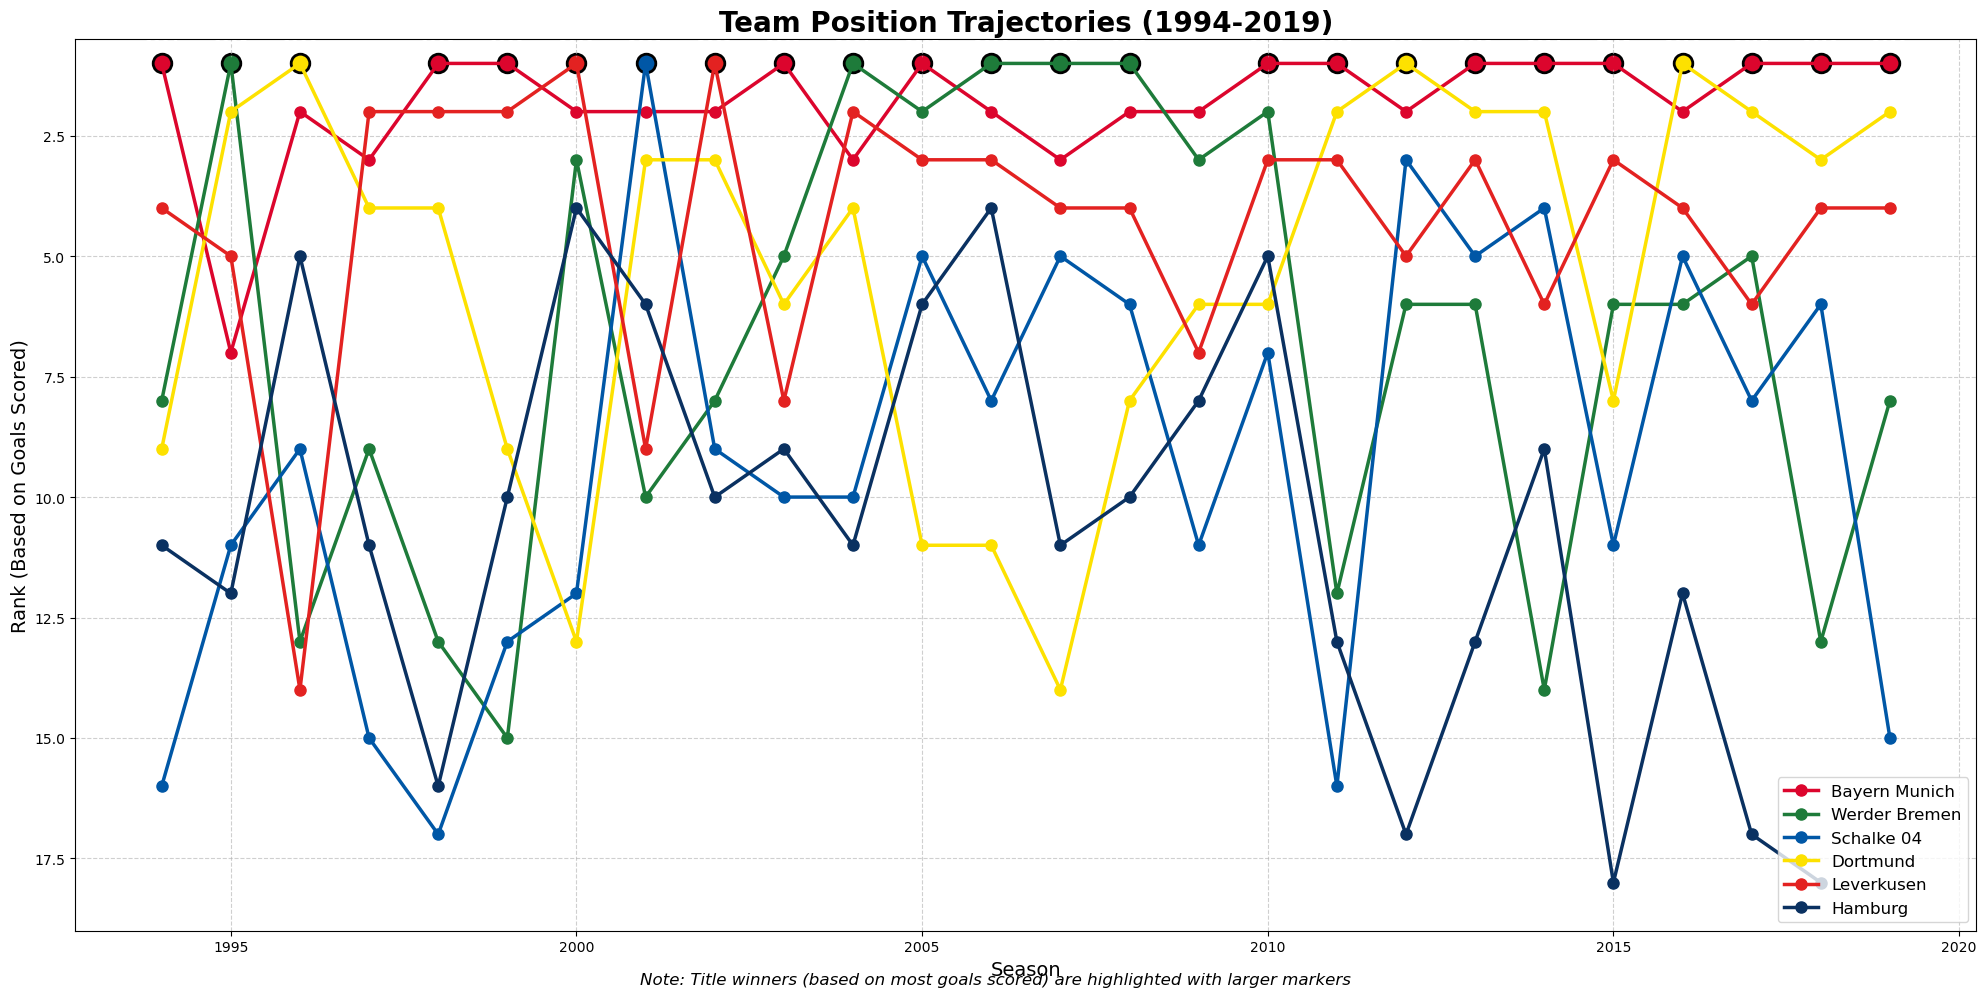

In [421]:
fig, ax = plt.subplots(figsize=(20, 10))

# Plot top teams
for team in top_teams:
    team_data = top_team_rankings[top_team_rankings['Team'] == team]
    ax.plot(team_data['Season'], team_data['Rank'], 
            color=team_colors.get(team, 'gray'), linewidth=2.5, marker='o', markersize=8, label=team)
    
    # Highlight championships
    team_titles = title_winners[title_winners['Team'] == team]
    for _, row in team_titles.iterrows():
        ax.scatter(row['Season'], row['Rank'], s=180, color=team_colors.get(team, 'gray'), 
                  edgecolors='black', linewidth=2)
        ax.text(row['Season'], row['Rank']-0.4, f"{int(row['Season'])}", 
               ha='center', va='center', fontsize=9, fontweight='bold', color='white')

# Styling
ax.set_ylim(ranking_df['Rank'].max() + 1, 0.5)
ax.set_title('Team Position Trajectories (1994-2019)', fontsize=20, fontweight='bold')
ax.set_xlabel('Season', fontsize=14)
ax.set_ylabel('Rank (Based on Goals Scored)', fontsize=14)
ax.grid(True, linestyle='--', alpha=0.6)
ax.legend(loc='lower right', fontsize=12)
plt.figtext(0.5, 0.01, 'Note: Title winners (based on most goals scored) are highlighted with larger markers', 
           ha='center', fontsize=12, style='italic')

plt.tight_layout()
plt.show()

### *Volatility Analysis - Rank changes between seasons*

In [423]:
volatility = []

for team in top_team_rankings['Team'].unique():
    team_data = top_team_rankings[top_team_rankings['Team'] == team].sort_values('Season')
    
    # Season-to-Season Rank Change
    team_data['RankChange'] = team_data['Rank'].diff()
    team_volatility = team_data['RankChange'].std() # volatility (standard deviation of rank changes)
    
    volatility.append({'Team': team,
                 'Volatility': team_volatility,
                    'AvgRank': team_data['Rank'].mean(),
              'MaxRankChange': team_data['RankChange'].abs().max()})

# Volatility dataframe
vol_df = pd.DataFrame(volatility).sort_values('Volatility', ascending=False)

vol_df.head()

,Team,Volatility,AvgRank,MaxRankChange
2,Werder Bremen,5.816643,6.615385,12.0
5,Schalke 04,5.740790,9.153846,13.0
4,Hamburg,4.903230,10.640000,9.0
1,Leverkusen,4.573474,4.307692,12.0
3,Dortmund,4.158525,5.269231,10.0


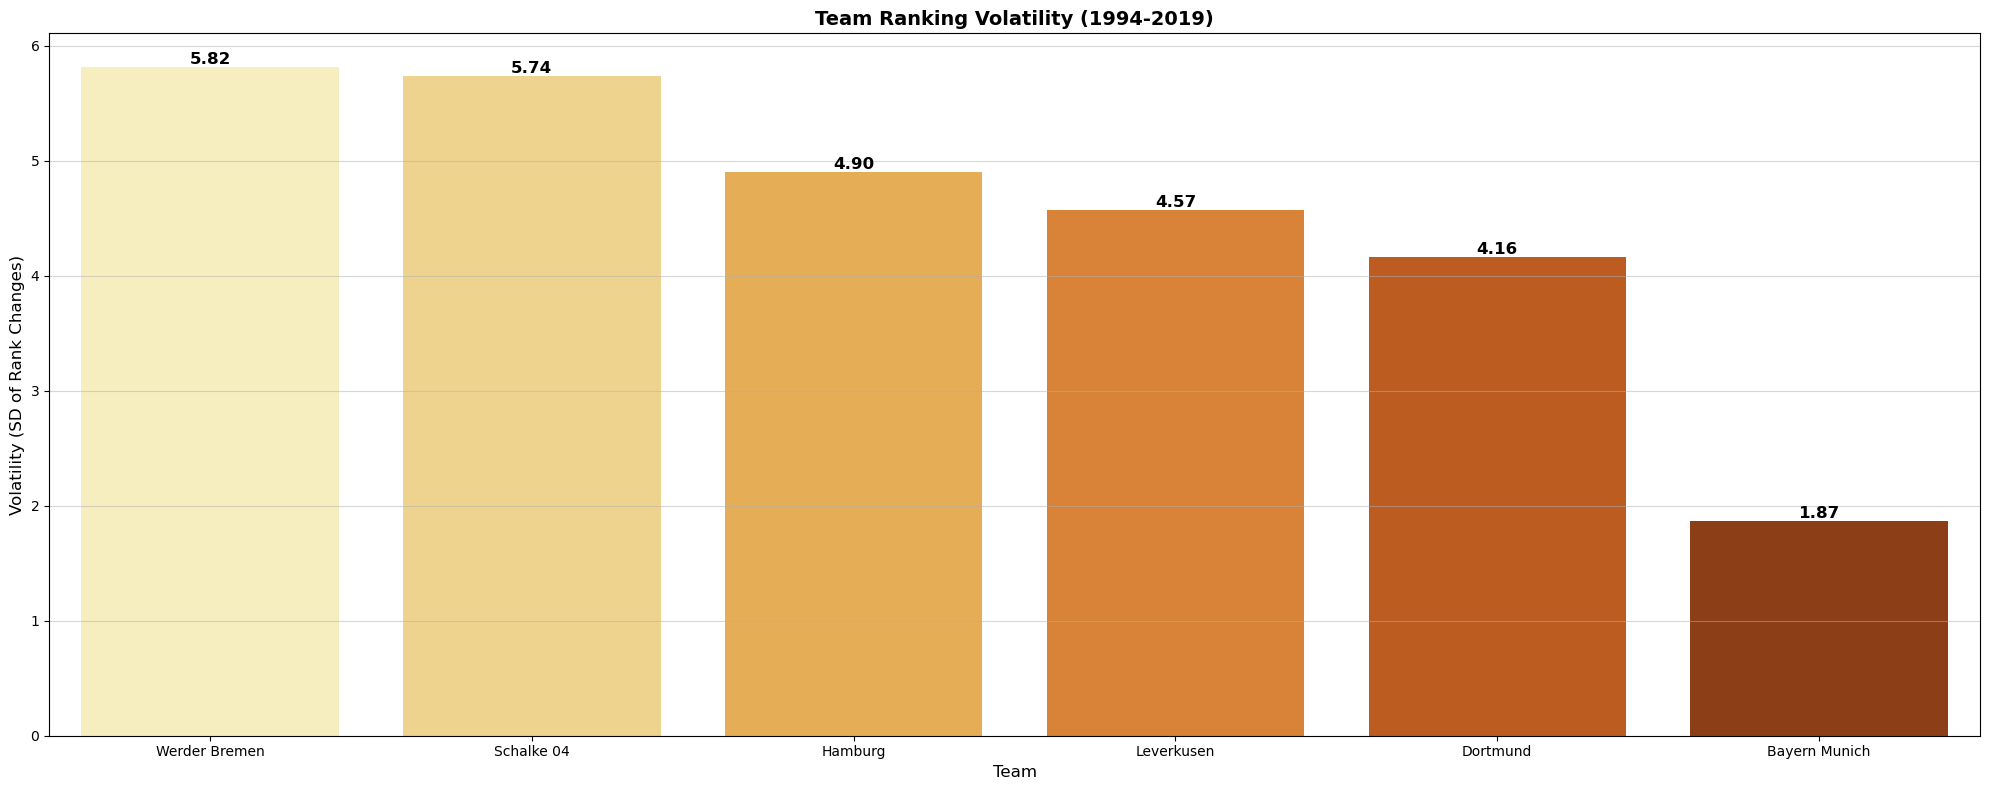

In [553]:
# Volatility barplot top6 teams
plt.figure(figsize = (20, 8))
bar_plot = sns.barplot(x = 'Team', y='Volatility', hue='Team', data = vol_df, palette='YlOrBr', legend=False)

for i, p in enumerate(bar_plot.patches): # Annotating bars with values
    bar_plot.annotate(f"{vol_df.iloc[i]['Volatility']:.2f}",
                    (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom', fontsize=12, fontweight='bold')

plt.title('Team Ranking Volatility (1994-2019)', fontsize=14, fontweight='bold')
plt.xlabel('Team', fontsize=12)
plt.ylabel('Volatility (SD of Rank Changes)', fontsize=12)
plt.grid(True, alpha=0.5, axis='y')
plt.tight_layout()
plt.show()

In [549]:
# Volatility (standard deviation of rank) for each team
team_volatility = ranking_df.groupby('Team')['Rank'].agg(['mean', 'std']).reset_index()

# Only including teams that have been in at least 5 seasons (the most relevant teams basically)
team_counts = ranking_df.groupby('Team').size().reset_index(name='Seasons')
team_volatility = pd.merge(team_volatility, team_counts, on='Team')
team_volatility = team_volatility[team_volatility['Seasons'] >= 5]
team_volatility = team_volatility.sort_values('std', ascending=True)

# normalization
max_std = team_volatility['std'].max()
min_std = team_volatility['std'].min()
team_volatility['normalized_std'] = (team_volatility['std'] - min_std) / (max_std - min_std)

# Creating volatility color map
team_volatility['color'] = team_volatility['normalized_std'].apply(lambda x: (x, 0.8-0.6*x, 0.2))  # Red to green gradient

team_volatility.head(8)

,Team,mean,std,Seasons,normalized_std,color
6,Cottbus,15.500000,0.836660,6,0.000000,"(0.0, 0.8, 0.2)"
2,Bayern Munich,1.807692,1.265519,26,0.095322,"(0.09532233590210133, 0.7428065984587392, 0.2)"
26,Leverkusen,4.307692,2.810968,26,0.438829,"(0.43882859773501687, 0.5367028413589899, 0.2)"
29,Mainz,10.461538,3.017046,13,0.484633,"(0.48463349190926824, 0.5092199048544391, 0.2)"
1,Augsburg,12.375000,3.067689,8,0.495890,"(0.49588992862145365, 0.5024660428271279, 0.2)"
10,Duisburg,13.750000,3.412163,8,0.572456,"(0.572456118080928, 0.45652632915144326, 0.2)"
3,Bielefeld,13.777778,3.492054,9,0.590214,"(0.5902135400602136, 0.44587187596387184, 0.2)"
28,M'gladbach,9.818182,3.874660,22,0.675255,"(0.6752550397646833, 0.3948469761411901, 0.2)"


/var/folders/7c/pvybjh094kv1kx3g5xlrqlg80000gp/T/ipykernel_67337/1881687496.py:30: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0.2, 1, 0.95])


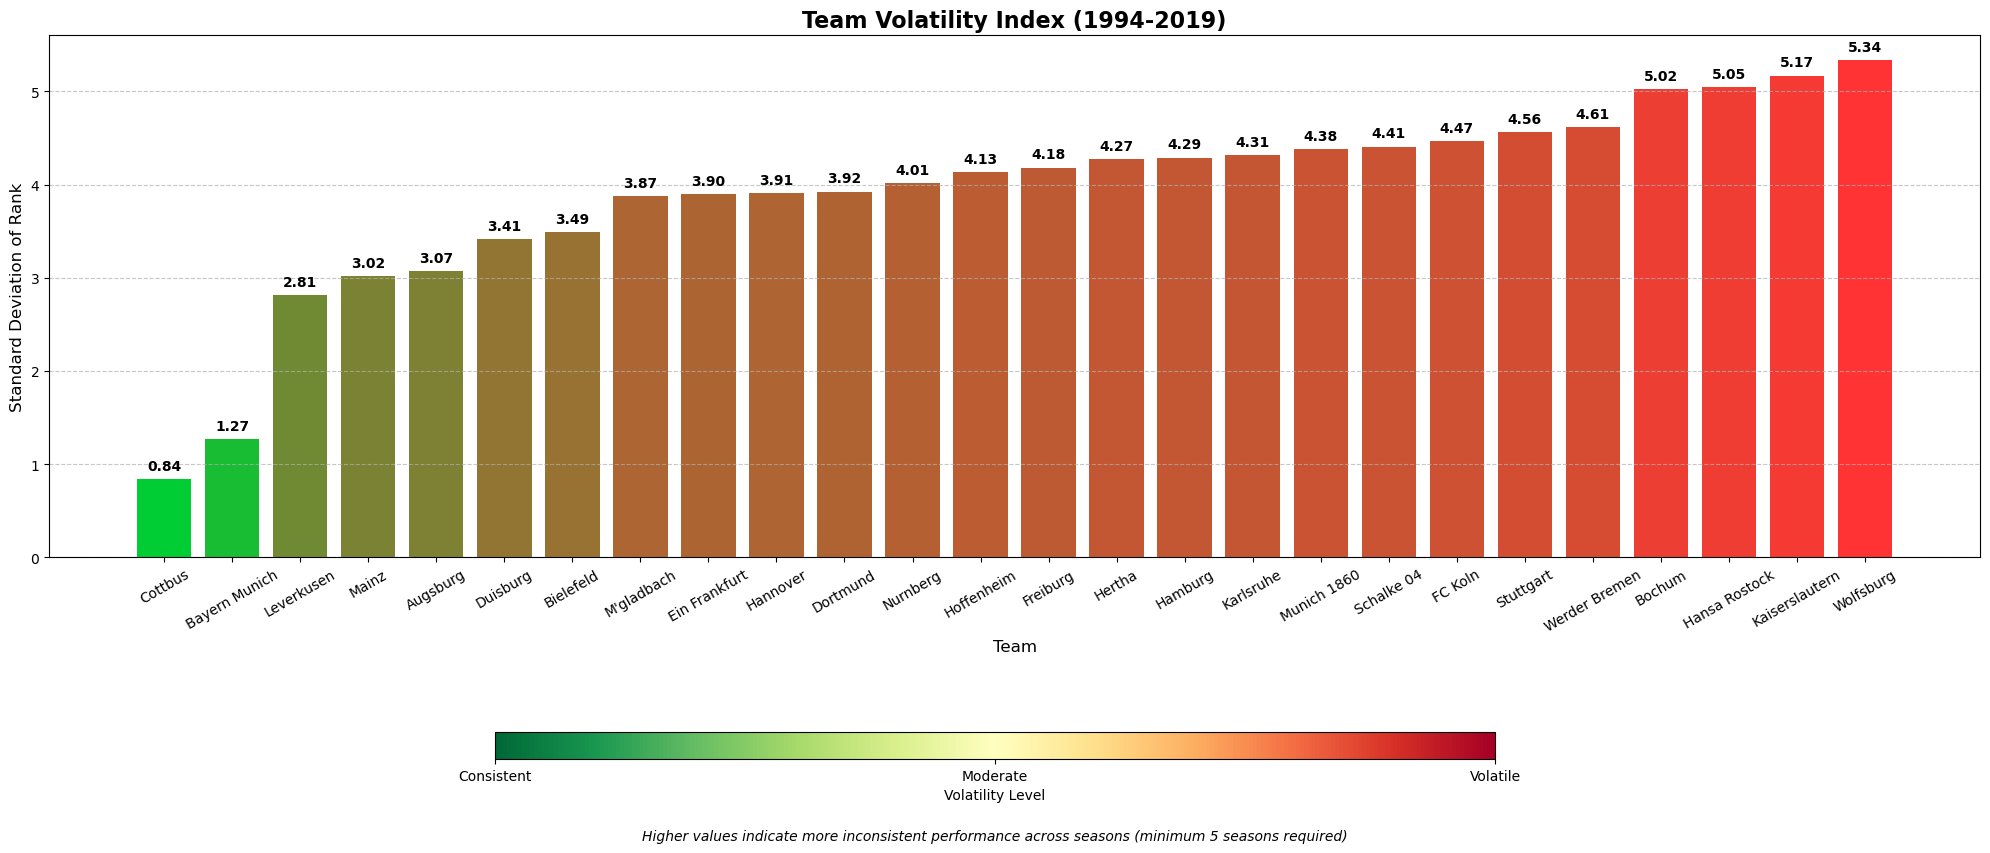

In [487]:
fig, ax = plt.subplots(figsize=(20, 9))
bars = ax.bar(team_volatility['Team'], team_volatility['std'], color=team_volatility['color'].tolist())

ax.set_title('Team Volatility Index (1994-2019)', fontsize=16, fontweight='bold')
ax.set_xlabel('Team', fontsize=12)
ax.set_ylabel('Standard Deviation of Rank', fontsize=12)
ax.set_xticks(range(len(team_volatility)))
ax.set_xticklabels(team_volatility['Team'], rotation=30)
ax.grid(axis='y', linestyle='--', alpha=0.7)

for bar, value in zip(bars, team_volatility['std']):  # Adding text labels with exact values
    ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.1,
        f'{value:.2f}', ha='center', fontweight='bold', fontsize=10)

# Add annotations
plt.figtext(0.5, 0.01, 
           'Higher values indicate more inconsistent performance across seasons (minimum 5 seasons required)',
           ha='center', fontsize=10, style='italic')

sm = plt.cm.ScalarMappable(cmap=plt.cm.RdYlGn_r, norm=plt.Normalize(vmin = min_std, vmax = max_std)) # Avoiding errors from seaborn
sm.set_array([])

# Creating a new axis for the colorbar at the bottom (to separate the plot from it)
cbar_ax = fig.add_axes([0.25, 0.1, 0.5, 0.03])  # [left, bottom, width, height]
cbar = fig.colorbar(sm, cax = cbar_ax, orientation='horizontal')
cbar.set_label('Volatility Level')
cbar.set_ticks([min_std, (min_std+max_std)/2, max_std])
cbar.set_ticklabels(['Consistent', 'Moderate', 'Volatile'])

plt.tight_layout(rect=[0, 0.2, 1, 0.95])
plt.show()

# PART 5: Overall performance (R and Python)
- Define unique color for each team per season. For each season create horizontal bar plot using total
number of points. Highlighting the winner with the unique color that you assigned to it. Save all
graphs in pdf. (R)
- Redo the same task in python. But instead of total points use goal difference. Use same logic for colors
as in first part. (Python)

In [513]:
print(unique_teams)

['Bayern Munich' 'Dortmund' 'Duisburg' 'FC Koln' 'Hamburg' 'Leipzig'
 "M'Gladbach" 'Wattenscheid' 'Werder Bremen' 'Dresden' 'Ein Frankfurt'
 'Freiburg' 'Kaiserslautern' 'Karlsruhe' 'Leverkusen' 'Nurnberg'
 'Schalke 04' 'Stuttgart' 'Uerdingen' 'Bochum' 'Munich 1860' "M'gladbach"
 'Hansa Rostock' 'St Pauli' 'Dusseldorf' 'Bielefeld' 'Hertha' 'Wolfsburg'
 'Ulm' 'Unterhaching' 'Cottbus' 'Hannover' 'Mainz' 'Aachen' 'Hoffenheim'
 'Augsburg' 'Greuther Furth' 'Fortuna Dusseldorf' 'Braunschweig'
 'Paderborn' 'Darmstadt' 'Ingolstadt' 'RB Leipzig']


In [563]:
team_colors = {'Bayern Munich': '#DC052D',      # Official Bayern red
                'Dortmund': '#FDE100',           # BVB yellow
                'Duisburg': '#0046AD',           # Duisburg blue
                'FC Koln': '#ED1C24',            # Köln red
                'Hamburg': '#0C2240',            # HSV blue (darker official shade)
                'Leipzig': '#B1003C',            # RB Leipzig dark red
                "M'Gladbach": '#18A33C',         # Gladbach green
                'Wattenscheid': '#F7D917',       # Wattenscheid yellow
                'Werder Bremen': '#1D9053',      # Werder green
                'Dresden': '#F0E453',            # Dresden yellow
                'Ein Frankfurt': '#E1000F',      # Eintracht Frankfurt red
                'Freiburg': '#D31230',           # Freiburg red
                'Kaiserslautern': '#D3171E',     # Kaiserslautern red
                'Karlsruhe': '#0C4C92',          # KSC blue
                'Leverkusen': '#E32221',         # Leverkusen red
                'Nurnberg': '#9B1C1F',           # Nürnberg dark red
                'Schalke 04': '#004D9D',         # Schalke royal blue
                'Stuttgart': '#DA291C',          # Stuttgart red
                'Uerdingen': '#E30613',          # Uerdingen red
                'Bochum': '#144DA3',             # Bochum blue
                'Munich 1860': '#006AB3',        # 1860 Munich blue
                "M'gladbach": '#18A33C',         # Duplicate of Gladbach
                'Hansa Rostock': '#00A5DC',      # Hansa Rostock blue
                'St Pauli': '#A52A2A',           # St. Pauli brown
                'Dusseldorf': '#EE1D23',         # Düsseldorf red
                'Bielefeld': '#004F9F',          # Bielefeld blue
                'Hertha': '#004B9C',             # Hertha blue
                'Wolfsburg': '#4C9E2F',          # Wolfsburg green
                'Ulm': '#001489',                # Ulm blue
                'Unterhaching': '#E30613',       # Unterhaching red
                'Cottbus': '#E30613',            # Cottbus red
                'Hannover': '#C11D28',           # Hannover red
                'Mainz': '#ED1C24',              # Mainz red
                'Aachen': '#FFED00',             # Aachen yellow
                'Hoffenheim': '#1E87C5',         # Hoffenheim blue
                'Augsburg': '#D80A14',           # Augsburg red
                'Greuther Furth': '#0AAC4A',     # Greuther Fürth green
                'Fortuna Dusseldorf': '#E4002B', # Fortuna Düsseldorf red
                'Braunschweig': '#FBBA00',       # Braunschweig yellow
                'Paderborn': '#005CA9',          # Paderborn blue
                'Darmstadt': '#0045A1',          # Darmstadt blue
                'Ingolstadt': '#CC0033',         # Ingolstadt red
                'RB Leipzig': '#B1003C'}          # RB Leipzig red

In [561]:
season_team_stats = Team_season_stats.copy()
season_team_stats['GoalDifference'] = season_team_stats['TotalGoalsScored'] - season_team_stats['TotalGoalsConceded']

champions = ranking_df[ranking_df['Rank'] == 1][['Season', 'Team']]
all_teams = season_team_stats['Team'].unique()

In [559]:
with pdf.PdfPages('season_goal_differences.pdf') as pdf_file:
    for season in sorted(season_team_stats['Season'].unique()):
        season_data = season_team_stats[season_team_stats['Season'] == season].sort_values('GoalDifference', ascending=True)
        champion = champions[champions['Season'] == season]['Team'].values[0] if len(champions[champions['Season'] == season]) > 0 else None
        
        fig, ax = plt.subplots(figsize=(20, 8))
        bars = ax.barh(season_data['Team'], season_data['GoalDifference'],
                      color = [team_colors.get(team, 'turquoise') for team in season_data['Team']])
        
        for i, bar in enumerate(bars):
            width = bar.get_width()
            ax.text(width + 1 if width > 0 else width - 1, bar.get_y() + bar.get_height()/2, 
                   f'{width:.0f}', va='center', ha='left' if width > 0 else 'right', fontsize=9)
            
            if season_data['Team'].iloc[i] == champion:
                ax.text(width + 3, bar.get_y() + bar.get_height()/2, 'CHAMPION', 
                       va='center', fontweight='bold', fontsize = 10, color=team_colors.get(champion, '#000000'))
        
        ax.axvline(x = 0, color='black', alpha=0.3)
        ax.set_title(f'Goal Difference by Team - Season {season}', fontsize=16, fontweight='bold')
        ax.set_xlabel('Goal Difference', fontsize=12)
        ax.grid(axis = 'x', linestyle='--', alpha=0.6)
        
        pdf_file.savefig()
        plt.close()